# Introduction

Github repository: https://github.com/apurvibh/expert-guacamole

Medium article: https://apurvibhartia.medium.com/building-ml-models-to-classify-traffic-signs-37534e1c53e5

I will be conduting exploratory data analysis & classification prediction using ML models on traffic sign data to find the best model that classfies traffic signs.

Select traffic.txt from this link to download dataset:
https://benchmark.ini.rub.de/gtsdb_dataset.html


**Importing packages & data**

In [6]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import spearmanr
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import metrics
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("traffic.txt",sep=';', header=None)
print(df)
df.head()

Saving traffic.txt to traffic.txt
             0     1    2     3    4   5
0    00000.ppm   774  411   815  446  11
1    00001.ppm   983  388  1024  432  40
2    00001.ppm   386  494   442  552  38
3    00001.ppm   973  335  1031  390  13
4    00002.ppm   892  476  1006  592  39
..         ...   ...  ...   ...  ...  ..
847  00570.ppm   881  416   914  449   9
848  00571.ppm  1287  361  1308  384  17
849  00575.ppm   403  474   435  506  38
850  00593.ppm   584  510   608  534  38
851  00599.ppm   700  454   722  476   9

[852 rows x 6 columns]


,0,1,2,3,4,5
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39


In [3]:
#renaming column names from read me file 
df = df.rename(columns={0: "ImgNo.ppm", 1: "leftCol", 2: "topRow", 3: "rightCol", 4: "bottomRow", 5: "ClassID"})
print(df)
# Total number of rows and columns
df.shape # high level understanding

     ImgNo.ppm  leftCol  topRow  rightCol  bottomRow  ClassID
0    00000.ppm      774     411       815        446       11
1    00001.ppm      983     388      1024        432       40
2    00001.ppm      386     494       442        552       38
3    00001.ppm      973     335      1031        390       13
4    00002.ppm      892     476      1006        592       39
..         ...      ...     ...       ...        ...      ...
847  00570.ppm      881     416       914        449        9
848  00571.ppm     1287     361      1308        384       17
849  00575.ppm      403     474       435        506       38
850  00593.ppm      584     510       608        534       38
851  00599.ppm      700     454       722        476        9

[852 rows x 6 columns]


(852, 6)

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ImgNo.ppm  852 non-null    object
 1   leftCol    852 non-null    int64 
 2   topRow     852 non-null    int64 
 3   rightCol   852 non-null    int64 
 4   bottomRow  852 non-null    int64 
 5   ClassID    852 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 40.1+ KB


In [6]:
# find out the unique value to make categorical variable
print('ClassID')
print(*list(df.ClassID.unique()))

ClassID
11 40 38 13 39 4 9 21 2 12 1 25 30 23 27 35 15 33 28 18 36 26 37 34 0 24 14 20 29 6 10 8 5 16 19 17 3 7 41 31 22 42 32


In [6]:
a = df[df.ClassID ==8] # to analyse the characteristics for signals with a class ID of 8 

Text(0.5, 0.98, 'Factor plot of Class ID')

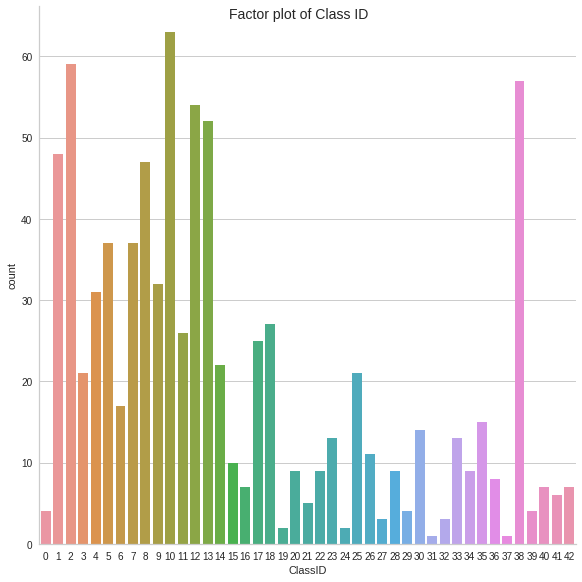

In [7]:
#distribution of class ID
figure = sn.factorplot(df.ClassID,data=df,kind='count', size = 8 )
figure.fig.suptitle('Factor plot of Class ID', fontsize= 14)
#plt.xticks(rotation=90) 

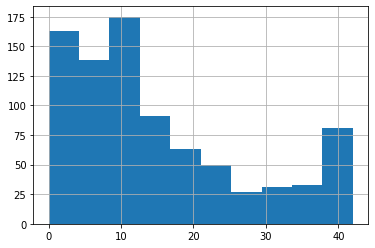

In [7]:
#distribution of class ID
df.ClassID.hist()

In [4]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)
# 240 rows and 13 columns are duplicate

number of duplicate rows:  (1, 6)


In [20]:
df.describe().T #only display numeric cloumn also
#df.describe(include='all').T #include non-numeric cloumn also

,count,mean,std,min,25%,50%,75%,max
leftCol,852.0,743.760563,323.872491,22.0,477.00,814.0,983.00,1305.0
topRow,852.0,427.825117,95.707723,8.0,382.75,437.0,497.25,637.0
rightCol,852.0,787.156103,327.097006,57.0,507.00,847.0,1025.00,1346.0
bottomRow,852.0,470.576291,84.386554,103.0,422.00,468.0,539.00,748.0
ClassID,852.0,14.889671,11.714265,0.0,6.00,12.0,22.00,42.0


In [21]:
# Analysis on topRow attribute 
Q1=df.topRow.quantile(.25)
Q3=df.topRow.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",df.topRow.min())
print("Max Value ",df.topRow.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)


Min Value 8
Max Value  637
Q1  382.75
Q3  497.25
IQR  114.5
lower_limit 211.0
upper_limit 669.0


Text(0.5, 1.0, 'Heatmap: Checking for missing values')

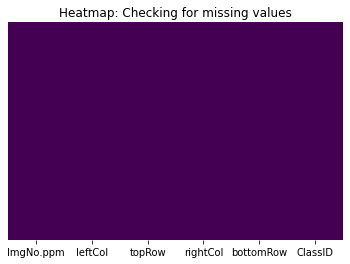

In [22]:
# to check missing value
sn.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis').set_title('Heatmap: Checking for missing values')

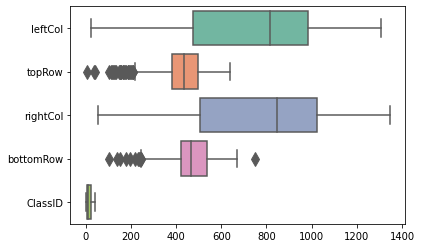

In [12]:
sn.boxplot(data=df, orient="h", palette="Set2", fliersize=10)

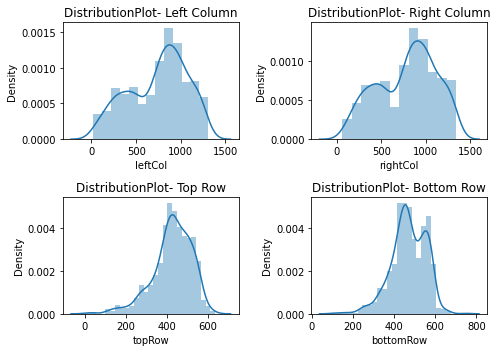

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(7,5))
axes[0,0].set_title('DistributionPlot- Left Column')
axes[0,1].set_title('DistributionPlot- Right Column')
axes[1,0].set_title('DistributionPlot- Top Row')
axes[1,1].set_title('DistributionPlot- Bottom Row')

sn.distplot(df.leftCol, ax=axes[0,0])
sn.distplot(df.rightCol,ax=axes[0,1]) 
sn.distplot(df.topRow, ax=axes[1,0])
sn.distplot(df.bottomRow,ax=axes[1,1]) 

fig.tight_layout();  

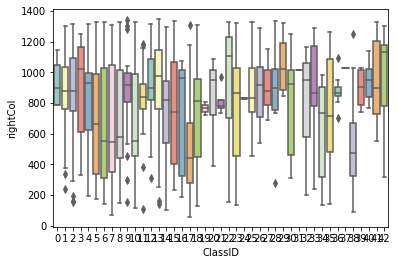

In [25]:
sn.boxplot(x=df.ClassID, y=df.rightCol, data=df, palette="Set3")

In [ ]:
df.ClassID.value_counts()

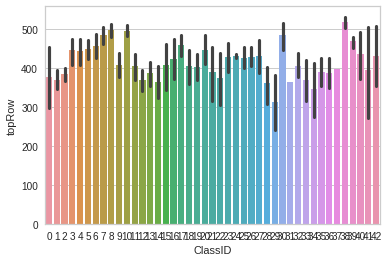

In [8]:
sn.barplot(x=df.ClassID, y=df.topRow)
# mean value for each condition value

In [9]:
fig = px.scatter(df, x=df.bottomRow, y=df.topRow, color="rightCol", size = df.ClassID, title='Scatter plot: topRow Vs. BottomRow')
fig.show()

In [10]:
fig = px.scatter(df, x=df.bottomRow, y=df.topRow, color="ClassID", size = df.leftCol, title='Scatter plot: topRow Vs. BottomRow')
fig.show()

In [11]:
fig = px.scatter(df, x=df.bottomRow, y=df.topRow, color="leftCol", size = df.ClassID, title='Scatter plot: topRow Vs. BottomRow')
fig.show()

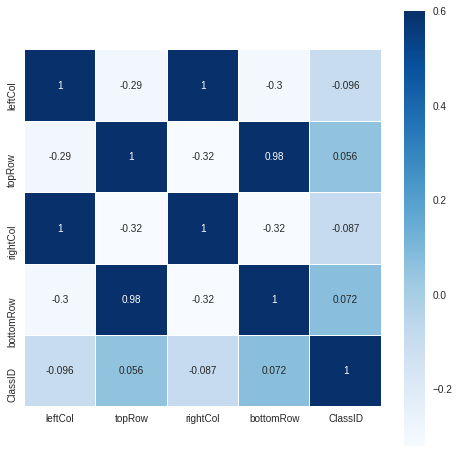

In [17]:
#Bivariate Analysis

correl=df.corr(method='spearman')
plt.figure(figsize=(8,8))
fig = sn.heatmap(correl,vmax=.6,linewidths=0.03,square=True,annot=True,cmap='Blues',linecolor='white')
# one variable influenced by other variable

# Train Test Split

In [7]:
X = df.iloc[:, 1:5]
y = df.iloc[:, 5]

print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

0      11
1      40
2      38
3      13
4      39
       ..
847     9
848    17
849    38
850    38
851     9
Name: ClassID, Length: 852, dtype: int64
(596, 4)
(596,)
(256, 4)
(256,)


# **Decision Tree Classifier** 

In [6]:
dt = DecisionTreeClassifier(criterion='entropy', splitter = 'best')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(y_pred) #y_pred has discrete values 

#the accuracy on the test partition
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

[ 9 10  3 26 18  5 23 10 11  6 41 34  5 13  9 38 40 18  8 21 21  8 41 20
 20  9 26  1  8 40  1 35  2  4  2  4  7 38  6 23  7 33  5 38 10 37 15 21
  8 35 36 26  8 13  1  6 13 35 18 38 33 35  8 11 10  5 10 26  5 42 25 12
  8  9 18 21 38 34 18  1  3 14  9 11  7  5 38 21  8  1  1 38  3 20  7 18
  9 38 11  1  2 34  1 35 10 17  6 42  5 25  6  8 25 35  1  5 10 38  1  9
  8 38  6 34 12 36  6 23  8 38  9 12  9 10 13 11 10  8 20  9  4  8 12  1
 15 15  8  8 13  5 36  3  4  6 11 26 12 21 18 29 21 23 13  2  9 23 34 26
 26  1 35 35  5 10 10  1  5  5 12 38 38 41 12 38  8 11 17 10 38  6  5  8
 36 12 10 35 29  4  9 10 40 18 16 12 26  4 15  5 33  5 36 25 35  4 25 20
 12  9  1  2 25 35  4  6  5  2 11 10 15 23  3 34  5 38  2  1  9  9  9 14
 11  4 36 30 13  2 38 12  0 38 18  2 12 12 20  8]
Accuracy = 0.0625


In [7]:
dt0 = DecisionTreeClassifier(criterion='gini', splitter = 'best') #gini
dt0.fit(X_train, y_train)
y_pred = dt0.predict(X_test)

#the accuracy on the test partition
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.09765625


In [8]:
dt1 = DecisionTreeClassifier(criterion='gini', splitter = 'random') #gini
dt1.fit(X_train, y_train)
y_pred = dt1.predict(X_test)

#the accuracy on the test partition
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.12890625


Best accuracy for Decision Trees: 0.16015625


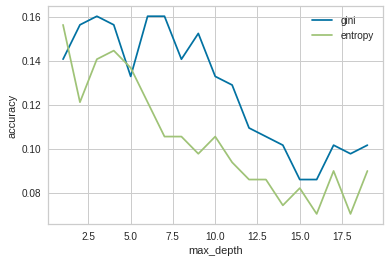

In [38]:
max_depth = []
gini_accuracy = []
entropy_accuracy = []

for a in range(1,20):
 dt = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=a) #highest for max_features=3
 dt.fit(X_train, y_train)
 pred_dt = dt.predict(X_test)
 gini_accuracy.append(accuracy_score(y_test, pred_dt))

 dt = DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth=a)
 dt.fit(X_train, y_train)
 pred_dt = dt.predict(X_test)
 entropy_accuracy.append(accuracy_score(y_test, pred_dt))

 max_depth.append(a)

dfx = pd.DataFrame({'entropy_accuracy':pd.Series(entropy_accuracy), 'gini_accuracy':pd.Series(gini_accuracy),
 'max_depth':pd.Series(max_depth)})

best_dt = max(gini_accuracy)

print("Best accuracy for Decision Trees:", best_dt)

plt.plot('max_depth','gini_accuracy', data=dfx, label='gini') 
plt.plot('max_depth','entropy_accuracy', data=dfx, label='entropy') 
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [8]:
#Multi Class Classification
#criterion='gini', splitter = 'best' has high accuracy 

dtfinal = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=6) 
dtfinal.fit(X_train, y_train)
y_pred = dtfinal.predict(X_test)

#the accuracy on the test partition
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.16015625


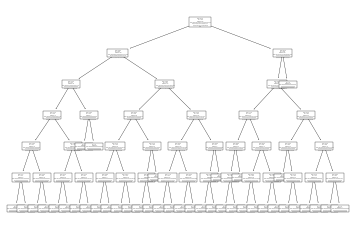

In [9]:
#Classification Tree 
plt.figure(2)
edibleTree = tree.plot_tree(dtfinal)
plt.show()

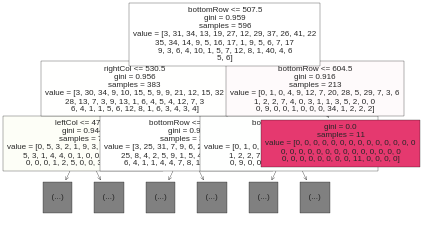

In [27]:
plt.figure(2)
fn = X.columns
signalTree = tree.plot_tree(dtfinal, max_depth=2, feature_names=fn, filled=True, fontsize =8, label='all') 
plt.savefig('signalTree.png')
plt.show() 

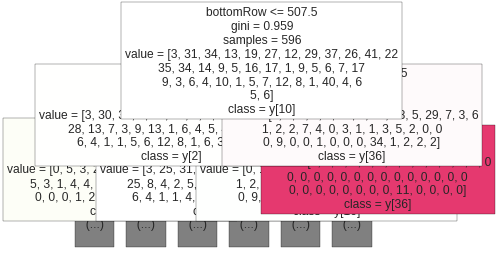

In [19]:
plt.figure(2)
fn = X.columns
signalTree = tree.plot_tree(dtfinal, max_depth=2, feature_names=fn, class_names=True, filled=True, fontsize =12, label='all') 
plt.savefig('signalTree0.png')
plt.show() 

In [20]:
print(y[36]) #printing classID for class y[36]

13


# **Random Forest model**

In [47]:
#Determining best value for n_estimators 
n = range(10, 120, 10) 

for i in n:
  model_rf = RandomForestClassifier(n_estimators=i,criterion='gini', max_depth=10,max_features=4, random_state=42) #max depth 
  model_rf.fit(X_train, y_train)
  predict_rf = model_rf.predict(X_test)
  accuracy_rf = accuracy_score(y_test, predict_rf)
  print("n_estimators:", i ,", Accuracy score:",accuracy_rf)

#n_estimators: 60 and 90 have the highest accuracy score 

n_estimators: 10 , Accuracy score: 0.1171875
n_estimators: 20 , Accuracy score: 0.13671875
n_estimators: 30 , Accuracy score: 0.13671875
n_estimators: 40 , Accuracy score: 0.1328125
n_estimators: 50 , Accuracy score: 0.140625
n_estimators: 60 , Accuracy score: 0.14453125
n_estimators: 70 , Accuracy score: 0.13671875
n_estimators: 80 , Accuracy score: 0.140625
n_estimators: 90 , Accuracy score: 0.14453125
n_estimators: 100 , Accuracy score: 0.140625
n_estimators: 110 , Accuracy score: 0.13671875


In [48]:
model_rf = RandomForestClassifier(n_estimators=60,criterion='entropy', max_features=3, random_state=42) #max depth 
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predict_rf)
print("Accuracy score:",accuracy_rf)

Accuracy score: 0.12109375


In [44]:
#max_features = 4 gives a higher accuracy score than max_features = 3
model_rf = RandomForestClassifier(n_estimators=60,criterion='entropy', max_features=4, random_state=42) #max depth 
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predict_rf)
print("Accuracy score:",accuracy_rf)

Accuracy score: 0.13671875


In [43]:
model_rf = RandomForestClassifier(n_estimators=60, criterion='gini', max_features=4, random_state=42) #max depth 
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predict_rf)
print("Accuracy score:",accuracy_rf)


Accuracy score: 0.140625


In [56]:
model_rf = RandomForestClassifier(n_estimators=60,criterion='gini', max_depth=10,max_features=3, random_state=42) #max depth 
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predict_rf)
print("Accuracy score:",accuracy_rf)

Accuracy score: 0.15234375


In [59]:
model_rf = RandomForestClassifier(n_estimators=60,criterion='gini', max_depth=6,max_features=4, random_state=42) #max depth 
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predict_rf)
print("Accuracy score:",accuracy_rf)

Accuracy score: 0.16015625


Best accuracy for Random Forests: 0.1640625


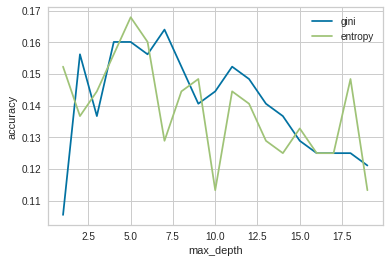

In [33]:
max_depth = []
gini_accuracy = []
entropy_accuracy = []

for a in range(1,20):
 rf = RandomForestClassifier(n_estimators=90, criterion='gini', max_depth=a, max_features=4, random_state=42) 
 rf.fit(X_train, y_train)
 pred_rf = rf.predict(X_test)
 gini_accuracy.append(accuracy_score(y_test, pred_rf))

 rf = RandomForestClassifier(n_estimators=90, criterion='entropy', max_depth=a)
 rf.fit(X_train, y_train)
 pred_rf = rf.predict(X_test)
 entropy_accuracy.append(accuracy_score(y_test, pred_rf))

 max_depth.append(a)

dfx = pd.DataFrame({'entropy_accuracy':pd.Series(entropy_accuracy), 'gini_accuracy':pd.Series(gini_accuracy),
 'max_depth':pd.Series(max_depth)})


best_rf = max(gini_accuracy)
print("Best accuracy for Random Forests:", best_rf)

plt.plot('max_depth','gini_accuracy', data=dfx, label='gini') 
plt.plot('max_depth','entropy_accuracy', data=dfx, label='entropy') 
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

# **AdaBoost Classification**

In [60]:
# AdaBoost Classification

base_est = DecisionTreeClassifier (max_depth =4)

n = range(10, 201, 25)

for i in n:
  ada_boost = AdaBoostClassifier(base_est, n_estimators=i, random_state=42, learning_rate=0.05)
  ada_boost.fit(X_train, y_train)
  predict_ada = ada_boost.predict(X_test)
  accuracy_ada = accuracy_score(y_test, predict_ada)
  print("n_estimators:", i ,", Accuracy score:",accuracy_ada)

#best when n_estimators = 60 or 85

n_estimators: 10 , Accuracy score: 0.12890625
n_estimators: 35 , Accuracy score: 0.1484375
n_estimators: 60 , Accuracy score: 0.15234375
n_estimators: 85 , Accuracy score: 0.15234375
n_estimators: 110 , Accuracy score: 0.13671875
n_estimators: 135 , Accuracy score: 0.1328125
n_estimators: 160 , Accuracy score: 0.12890625
n_estimators: 185 , Accuracy score: 0.13671875


In [65]:
lr = np.arange(0.01, 0.1, 0.01)
a = []
for i in lr:
  ada_boost = AdaBoostClassifier(base_est, n_estimators=75, random_state=42, learning_rate=i)
  ada_boost.fit(X_train, y_train)
  predict_ada = ada_boost.predict(X_test)
  accuracy_ada = accuracy_score(y_test, predict_ada)
  print(" Accuracy score:",accuracy_ada, ",learning_rate:", i )
  a.append(accuracy_ada)

best_ada_acc = max(a)


 Accuracy score: 0.13671875 ,learning_rate: 0.01
 Accuracy score: 0.140625 ,learning_rate: 0.02
 Accuracy score: 0.14453125 ,learning_rate: 0.03
 Accuracy score: 0.13671875 ,learning_rate: 0.04
 Accuracy score: 0.12890625 ,learning_rate: 0.05
 Accuracy score: 0.12890625 ,learning_rate: 0.060000000000000005
 Accuracy score: 0.08984375 ,learning_rate: 0.06999999999999999
 Accuracy score: 0.15625 ,learning_rate: 0.08
 Accuracy score: 0.1171875 ,learning_rate: 0.09


Best AdaBoostClassifier model: **learning_rate= 0.08, n_estimators = 75,
 Accuracy score: 0.15625**

# **Choosing the best model**

Text(0.5, 1.0, 'Comparing Classification Models')

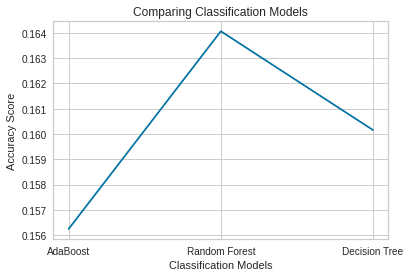

In [67]:
#Best model overall 

classifier_names = ['AdaBoost', 'Random Forest','Decision Tree' ]
acc_values = [best_ada_acc, best_rf, best_dt]

dfx = pd.DataFrame({'classifier_names':pd.Series(classifier_names), 'acc_values':pd.Series(acc_values)})


plt.plot('classifier_names','acc_values', data=dfx)  
plt.xlabel('Classification Models')
plt.ylabel('Accuracy Score')
plt.title('Comparing Classification Models')


**Cross Validation - Alpha in Lasso**

In [23]:
#Using cross validation to fine tune the model’s parameters such as alpha in lasso
#lasso drops the weak coefficients - in this 0.0096 seems like the weakest feature and can be potentially dropped
#weights should not be overinterpreted 

alpha_user = 0.0001 #using best alpha generated by code below 
lasso_model = Lasso(alpha=alpha_user,normalize=True)
lasso_model.fit(X_train,y_train)
lasso_coef = lasso_model.coef_
print(lasso_coef)


[-0.01240515 -0.04791177  0.00965241  0.06645087]


In [25]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lasso_model.coef_.transpose())
print(coef_table)

           0     Coefs
0    leftCol -0.012405
1     topRow -0.047912
2   rightCol  0.009652
3  bottomRow  0.066451


In [69]:
#Choosing the right alpha using the validation dataset comes in!
alpha_space = np.logspace(-4, 0, 50) #generating 50 values between 0 and 1
print(alpha_space)
model_scores = []

lasso_model = Lasso(normalize=True) 
for alpha in alpha_space:

    # Specify the alpha value to use
    lasso_model.alpha = alpha
    
    # Perform 10-fold CV
    lasso_cv_scores = cross_val_score(lasso_model,X_train,y_train,cv=10)
    
    # Append the mean of lasso_cv_scores to model_scores = []
    model_scores.append(np.mean(lasso_cv_scores))
  
best_alpha_index = np.argmax(model_scores)
print(np.max(model_scores))
print("best alpha:", alpha_space[best_alpha_index])

[1.00000000e-04 1.20679264e-04 1.45634848e-04 1.75751062e-04
 2.12095089e-04 2.55954792e-04 3.08884360e-04 3.72759372e-04
 4.49843267e-04 5.42867544e-04 6.55128557e-04 7.90604321e-04
 9.54095476e-04 1.15139540e-03 1.38949549e-03 1.67683294e-03
 2.02358965e-03 2.44205309e-03 2.94705170e-03 3.55648031e-03
 4.29193426e-03 5.17947468e-03 6.25055193e-03 7.54312006e-03
 9.10298178e-03 1.09854114e-02 1.32571137e-02 1.59985872e-02
 1.93069773e-02 2.32995181e-02 2.81176870e-02 3.39322177e-02
 4.09491506e-02 4.94171336e-02 5.96362332e-02 7.19685673e-02
 8.68511374e-02 1.04811313e-01 1.26485522e-01 1.52641797e-01
 1.84206997e-01 2.22299648e-01 2.68269580e-01 3.23745754e-01
 3.90693994e-01 4.71486636e-01 5.68986603e-01 6.86648845e-01
 8.28642773e-01 1.00000000e+00]
-0.018450533650937007
best alpha: 0.0001
